# 1D GP Regression Demo

In [1]:
import sys
sys.path.insert(0,'/home/emmanuel/projects/2019_sakame/src')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from data.make_dataset import ToyData
from models.gp_demo import DemoGP
from models.derivatives import RBFDerivative

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Sample Data

We have a few options regarding the sample functions:

* Linear
* Sin
* Sinc
* Polynomial
* X Sin

In [11]:
num_points = 500
noise = 0.2
num_points = 75
func = 'sin'
degree = 2
random_state = 123

x = np.linspace(-20, 20, num_points)

y = ToyData().regress_f(
    x,
    func=func,
    noise=noise,
    degree=degree,
    random_state=random_state
)

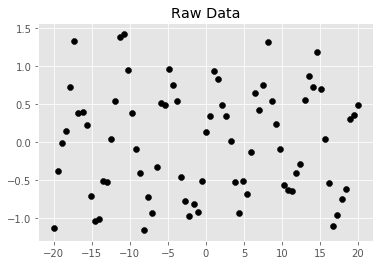

In [5]:
fig, ax = plt.subplots()

ax.scatter(x, y, color='Black')
ax.set_title('Raw Data')
plt.show()

## Train GP

In [17]:
%%time 

demo_gpmodel = DemoGP()
demo_gpmodel.train(x[:, None], y[:, None])

CPU times: user 5.53 s, sys: 14.2 ms, total: 5.54 s
Wall time: 205 ms


In [20]:
ypred, y_std =demo_gpmodel.get_predictions(x[:, None], return_std=True)

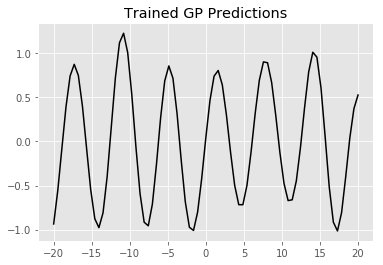

In [21]:
fig, ax = plt.subplots()

ax.plot(x, ypred, color='Black')
ax.set_title('Trained GP Predictions')
plt.show()

## Derivative

In [22]:
%%time


x_der = demo_gpmodel.get_derivatives(x[:, None])

CPU times: user 2.64 ms, sys: 16 µs, total: 2.66 ms
Wall time: 2.37 ms


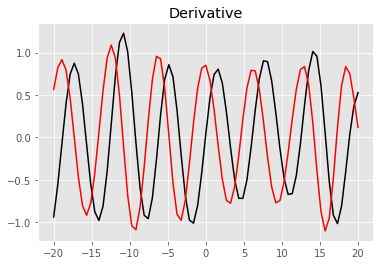

In [23]:
fig, ax = plt.subplots()

ax.plot(x, ypred, color='black')
ax.plot(x, x_der, color='red')
ax.set_title('Derivative')

plt.show()

## Sensitivity

In [24]:
%%time

x_sens = demo_gpmodel.get_point_sensitivity(x[:, None])

CPU times: user 1.32 ms, sys: 2.02 ms, total: 3.33 ms
Wall time: 2.96 ms


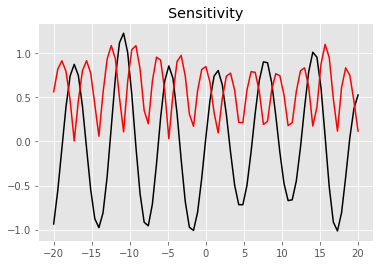

In [25]:
fig, ax = plt.subplots()


ax.plot(x, ypred, color='black')
ax.plot(x, x_sens, color='red')
ax.set_title('Sensitivity')

plt.show()

## For All Functions

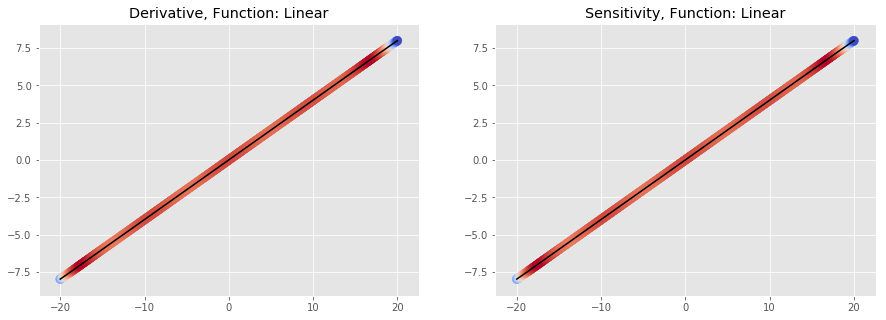

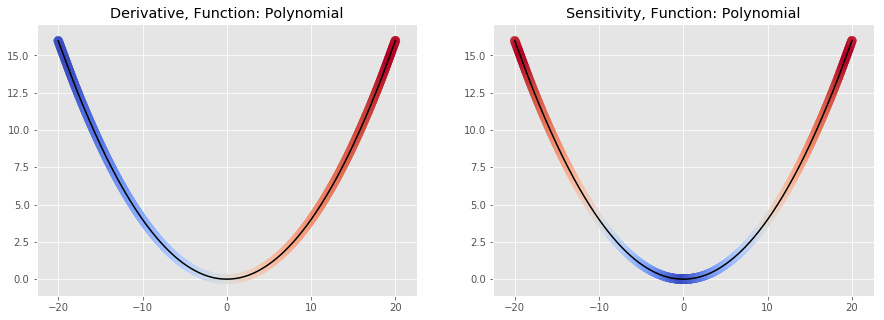

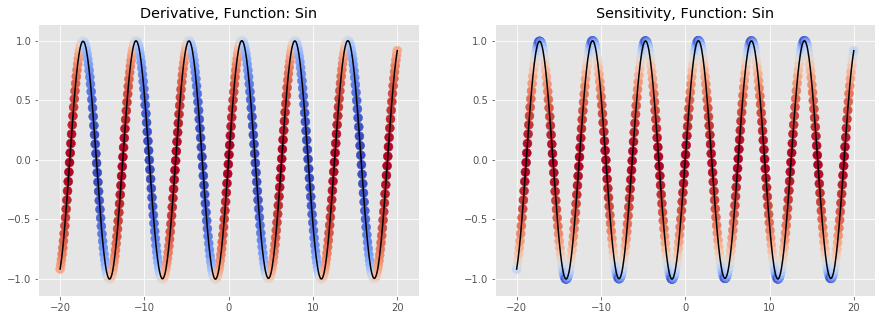

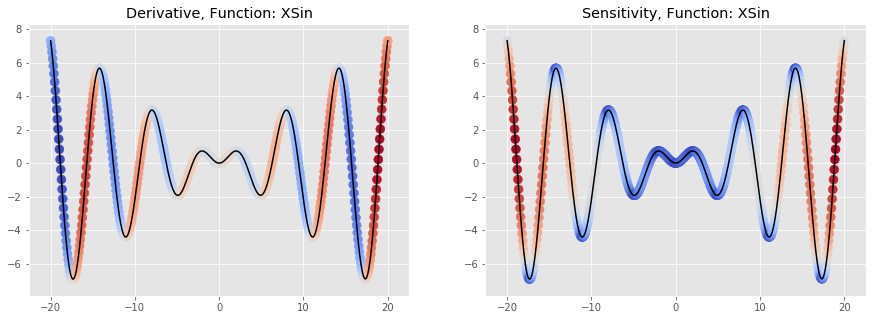

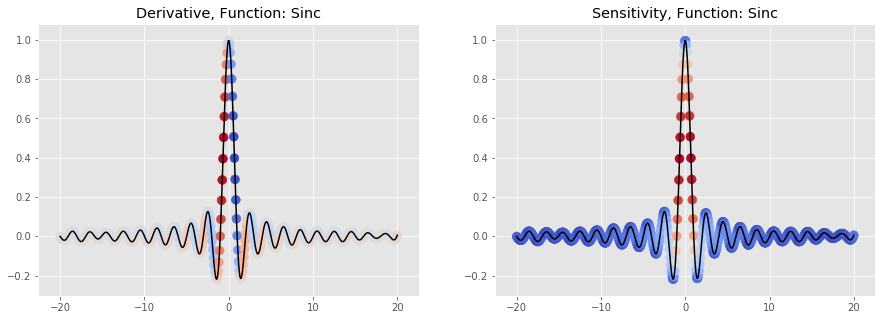

In [32]:
num_points = 500
noise = 0.01
colormap = plt.cm.get_cmap('coolwarm')
funcs = ['lin', 'poly', 'sin', 'xsin', 'sinc']
func_names = ['Linear', 'Polynomial', 'Sin', 'XSin', 'Sinc']

for (iteration, ifunc) in enumerate(funcs):
    # Initialize Demo Class
    x = np.linspace(-20, 20, num_points)

    y = ToyData().regress_f(
        x,
        func=ifunc,
        noise=noise,
        degree=degree,
        random_state=random_state
    )
    
    x = x[:, None]
    y = y[:, None]
        
    # Train GP
    demo_gpmodel = DemoGP()
    demo_gpmodel.train(x, y)
    
    # Predict test points
    ypred =demo_gpmodel.get_predictions(x, return_std=False).squeeze()
    
    # Calculate the Derivative
    x_der = demo_gpmodel.get_derivatives(x).squeeze()
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    ax[0].plot(x, ypred, color='black')
    ax[0].scatter(x.squeeze(), ypred.squeeze(), s=80, c=x_der.squeeze(), cmap=colormap)
    ax[0].set_title(f"Derivative, Function: {func_names[iteration]}")

    
    # Calculate the Sensitivity
    x_sens = demo_gpmodel.get_point_sensitivity(x).squeeze()
    
    ax[1].plot(x, ypred, color='black')
    ax[1].scatter(x.squeeze(), ypred.squeeze(), s=80, c=x_sens.squeeze(), cmap=colormap)
    ax[1].set_title(f"Sensitivity, Function: {func_names[iteration]}")

    plt.show()